# Visualizations using Pandas

Pandas uses Matplotlib in the background for plotting.

# 1. Example plots using a dataset

This dataset shows if a room is occupied or not based on certain measured paramters. Occupancy detection dataset obtained from [here](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#). 

Columns explanation:

- date: date and time when the values were recorded 
- Temperature: measured in Celsius
- Humidity: relative humidity - present state of absolute humidity relative to a maximum humidity given the same temperature expressed as a percentage
- Light: in Lux unit
- CO2: in ppm unit (parts per million)
- HumidityRatio: derived quantity from temperature and relative humidity, expressed in kilograms of water vapor per kilogram of dry air  
- Occupancy: the presence of a person in the room: the occupancy of the room was obtained from pictures that were taken every minute for 8 days (1 if a person is present, 0 otherwise)


In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib

# pyplot module is used to set the size of graphs, etc.
import matplotlib.pyplot as plt

# rcParams allow us to set the size global for the whole notebook 
# In some plots, we will define the size inside the plotting function 
plt.rcParams['figure.figsize'] = [13,9]

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
# Loading the data via locally into Jupyter notebook
 
data = pd.read_csv("Data/room_occupancy.txt")

In [3]:
# Take a look at the first 10 rows
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.7600,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.7900,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.7900,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.7900,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.7900,31.463333,437.333333,1027.333333,0.005084,1


# 2. Exploring the data
Data type of columns.

In [8]:
# Check columns data type
data.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

Note 'date' is an 'object'. 

In [9]:
# Convert 'date' column using Pandas to_datetime() function
data['date'] = pd.to_datetime(data['date'])

Checking for missing values

In [10]:
# Check missing values
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

# 3. Plot function

## 3.1 Default Line plot

Selecting all numerical columns and plotting them using `plot()`. Is there any drawback of this approach? 

<AxesSubplot:>

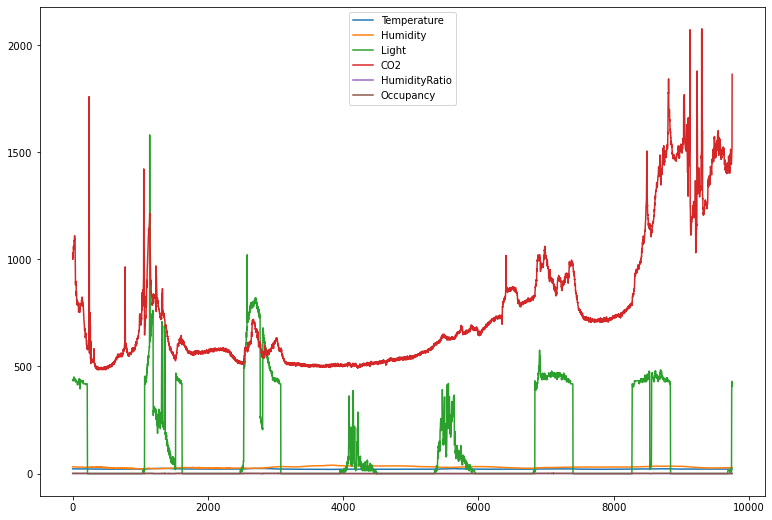

In [11]:
# Creating a line plot of numerical columns
data.select_dtypes('number').plot()

Plotting 'Temperature'

<AxesSubplot:>

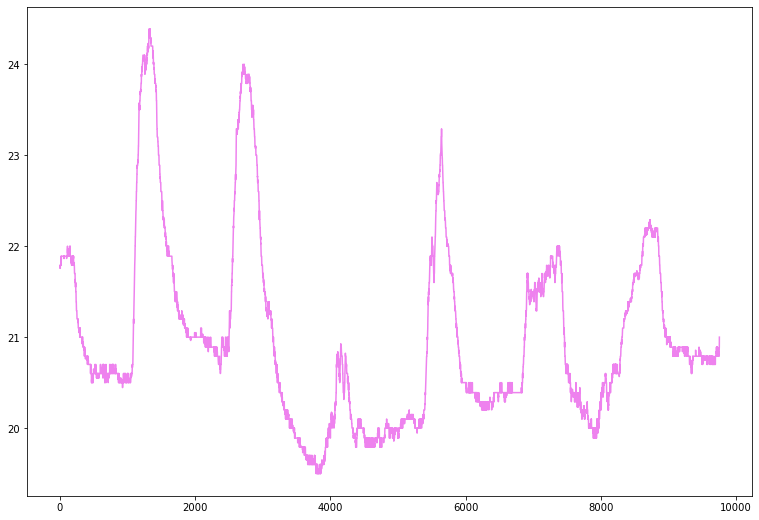

In [12]:
# Creating a line plot of 'Temperature'  
data['Temperature'].plot(color = 'violet')

To plot multiple columns, pass a **list** of columns:

``` data[['column_1', 'vcolumn_2']].plot(color = {'column_1':'yellow', 'column_2': 'black'})```

<AxesSubplot:>

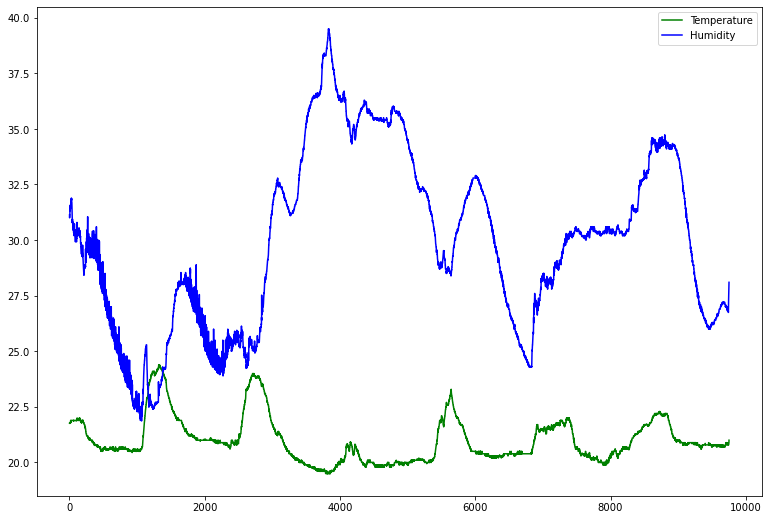

In [13]:
# TASK 1 >>> Create a lineplot of 'Temperature' and 'Humidity' columns
#        >>> Set the color of 'Temperature' to be 'green' and 'Humidity' to be 'blue'
#        >>> In the created plot, observe how humidity and temperature have been decreasing and increasing

data[['Temperature', 'Humidity']].plot(color = {'Temperature':'green', 'Humidity': 'blue'})

In [16]:
# Task: Write code to plot all numerical columns on the same scale

data_norm = data.select_dtypes('number')

In [17]:
data_norm = (data_norm - data_norm.min()) / (data_norm.max() - data_norm.min())

<AxesSubplot:>

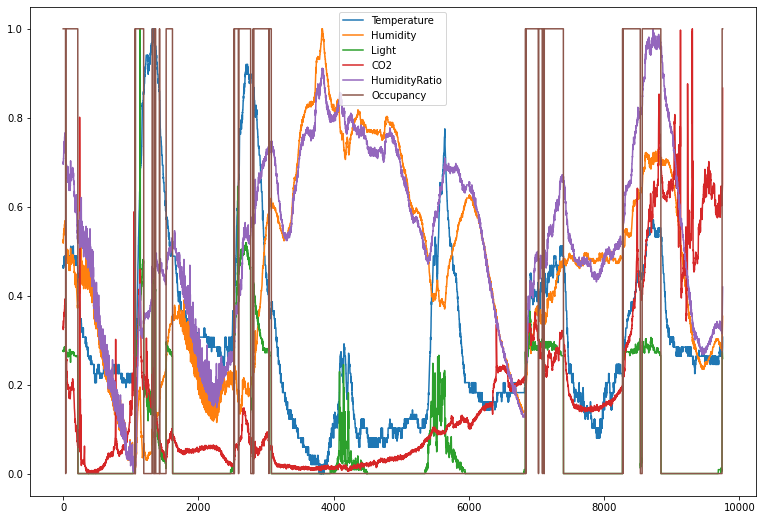

In [18]:
data_norm.plot()

### 3.1.1 Customizing parameters of a line plot

Setting some parameters. See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) for details.

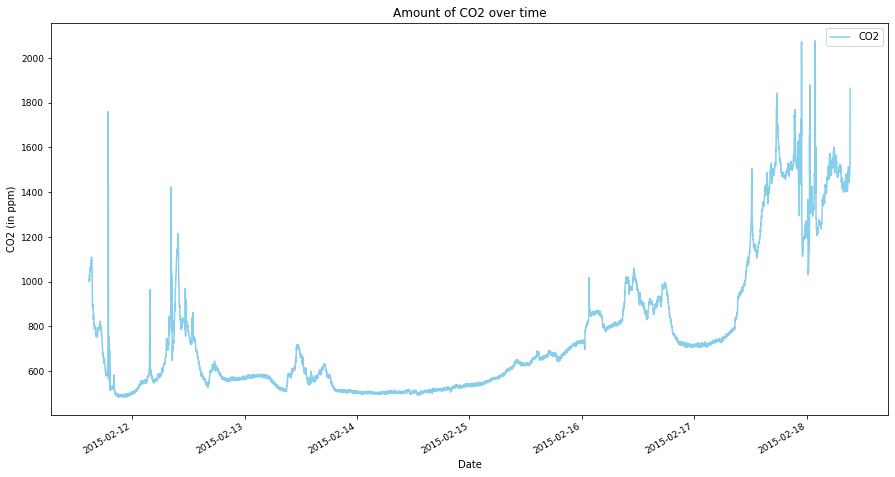

In [19]:
# A lineplot of the amount of CO2 vs. date

data.plot(x = 'date', y = 'CO2',             # Specifying variabes on the axis
          figsize = (15,8),                  # Setting a Figure object size as a tuple
          fontsize = 9,                      # Setting ticks font size 
          color = 'skyblue',                 # Setting a color
          title = 'Amount of CO2 over time', # Setting a title of a plot 
          xlabel = 'Date',                   # Customizing x-axis label (column name by default)
          ylabel = 'CO2 (in ppm)');          # Customizing y-axis label (no label by default)

The line plot shows a trend of CO2 amount over a period of time from 12.02.2015 (Thursday) to 18.02.2015 (Wednesday). The graph displays how the amount of CO2 has decreased during the weekend (14.02.2015 - 15.02.2015). 

## 3.2 Plot types

2 Approaches to plot data. Use  `kind` parameter to select other plot styles. 

➡ **First approach: plot() function**

There are 10 plot styles you can specify as an argument provided as a string:

- `hist`   - histogram  
- `box`    - boxplot  
- `bar`    - vertical barplot  
- `barh`   - horizontal barplot  
- `scatter`- scatterplot  
- `pie`    - pie plot  
- `kde`    - density plot  
- `density`- density plot  
- `area`   - area plot  
- `hexbin` - hexagonal bin plot  

➡ **Second approach: plotting functions**
Alternatively, all of these plots can be created using corresponding plotting functions:

- `DataFrame.plot.line`
- `DataFrame.plot.hist`
- `DataFrame.plot.box`
- `DataFrame.plot.bar`
- `DataFrame.plot.barh`
- `DataFrame.plot.scatter`
- `DataFrame.plot.pie`
- `DataFrame.plot.kde`
- `DataFrame.plot.density`
- `DataFrame.plot.area`
- `DataFrame.plot.hexbin`

Bonus: For a histogram and a boxplot there are aditionally two plotting functions: `DataFrame.hist()` and `DataFrame.boxplot()`!!!???

### 3.2.1 Histogram


A histogram displays the distribution of data points creating 'bins'.

In [20]:
# Take a look at the descriptive statistics using .describe()
data.HumidityRatio.describe()

count    9752.000000
mean        0.004589
std         0.000531
min         0.003275
25%         0.004196
50%         0.004593
75%         0.004998
max         0.005769
Name: HumidityRatio, dtype: float64

Let´s create a histogram of 'HumidityRatio' column.

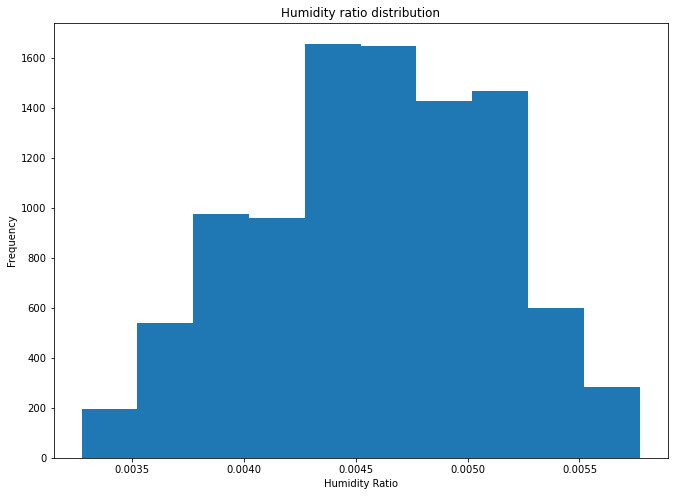

In [21]:
# Histogram
data['HumidityRatio'].plot(kind ='hist', 
                           figsize = (11,8), 
                           title = 'Humidity ratio distribution')     

# X-axis label
plt.xlabel('Humidity Ratio');                                    

#### 3.2.1.1 Customizing parameters of a histogram

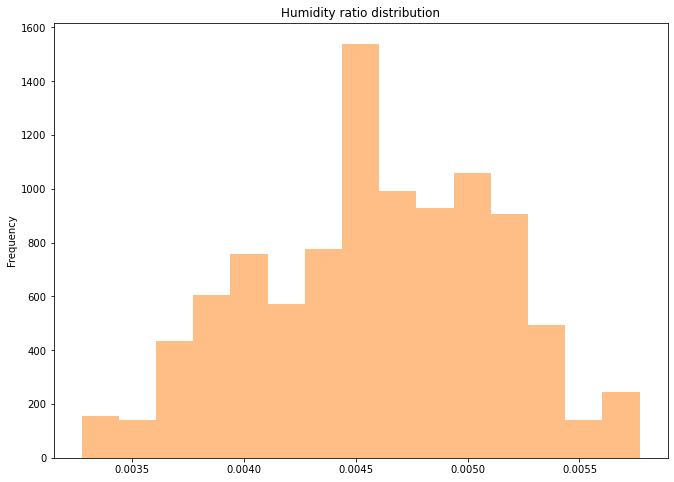

In [22]:
# The distribution of 'HumidityRatio'
data['HumidityRatio'].plot(kind ='hist',
                      figsize = (11,8),                      # Setting the size of a graph
                      bins = 15,                             # Changing the number of bins
                      color = '#ff7f0e',                     # Setting the color
                      alpha = .5,                            # Setting the transparency of a color                
                      title = 'Humidity ratio distribution');# Setting the title

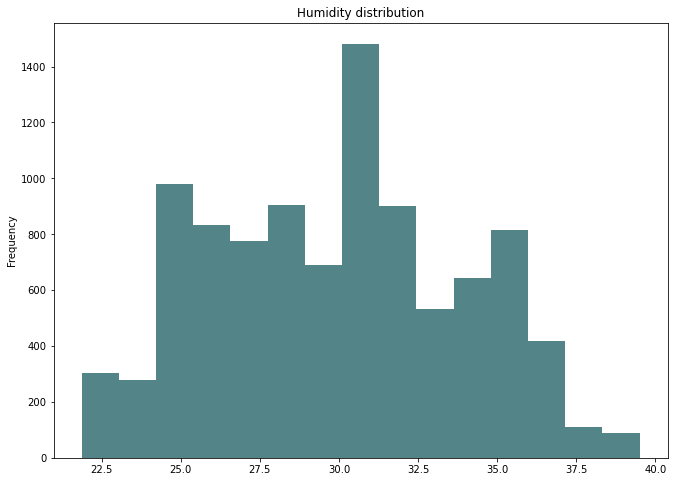

In [24]:
# TASK 2 >>> Create a histogram of 'Humidity' column in the same way as we did above
#        >>> Change the number of bins to 15 and observe the output 
#        >>> Set color parameter to '#095056'
#        >>> Set the transparency to .7
#        >>> Set the title to 'Humidity distribution'

data['Humidity'].plot(kind ='hist',
                      figsize = (11,8),                      # Setting the size of a graph
                      bins = 15,                             # Changing the number of bins
                      color = '#095056',                     # Setting the color
                      alpha = .7,                            # Setting the transparency of a color                
                      title = 'Humidity distribution');      # Setting the title

Using `hist()` function on the whole DataFrame to get a picture of the distribution per column:

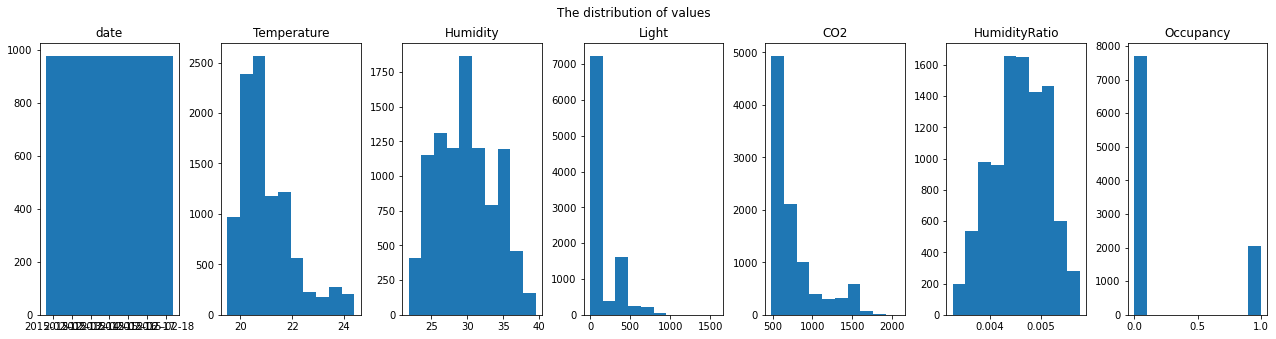

In [25]:
# The data distribution of all of the columns

data.hist(layout = (1,7),                        # Setting layout of 1 rows and 7 columns
          grid = False,                          # Disabling the grid
          figsize = (22,5))                      # Setting the size of graph
plt.suptitle('The distribution of values');      # Adding a suptitle using Matplotlib

### 3.2.2 Boxplot (box-and-whisker plot)

The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) for details.

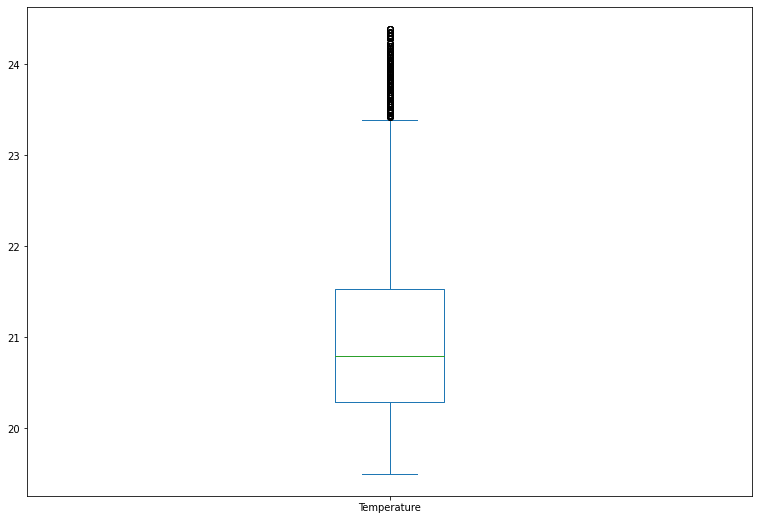

In [26]:
# Creating a boxplot of 'Temperature'
data['Temperature'].plot(kind = 'box');

In [27]:
# Computing 25th percentile, median value and 75th percentile of 'Temperature' column
perc_25, median, perc_75 = data.Temperature.quantile([.25,.5,.75])

In [28]:
# Printing the output
perc_25, median, perc_75

(20.29, 20.79, 21.5333333333333)

#### 3.2.2.1 Customizing parameters of a boxplot

If you want to customize things such as color, width, or line style, use `boxprops`,`whiskerprops`,`medianprops` and `capprops` parameters.

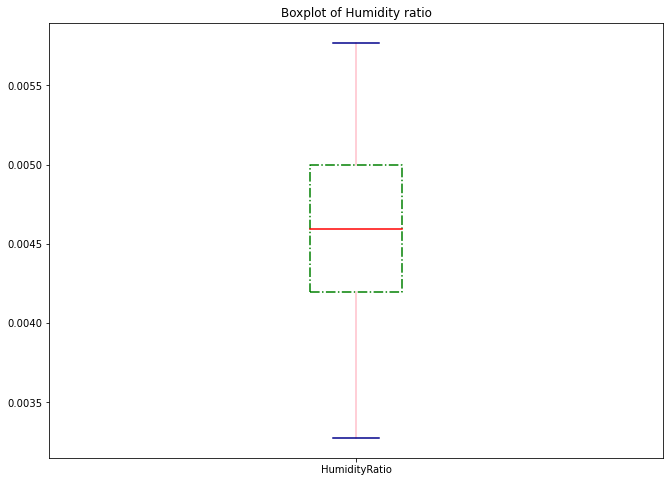

In [29]:
# A boxplot of relative humidity
data['HumidityRatio'].plot(kind = 'box', 
                           figsize = (11,8),
                           boxprops = dict(linewidth = 1.5, color = 'green',linestyle = '-.'),# Customizing the box
                           whiskerprops = dict(linewidth = 1.5, color = 'pink'),              # Customizing the whiskers
                           medianprops = dict(linewidth = 1.5, color = 'red'),                # Customizing median line
                           capprops = dict(linewidth = 1.5, color = 'darkblue'),              # Customizing caps on the whiskers
                           title = 'Boxplot of Humidity ratio');

Using `boxplot()` from `Pandas`. 

Boxplots are useful to compare two or more groups. For example, amount of carbon dioxide ('CO2' column) and person´s presence in the room ('Occupancy' column).

In [30]:
data.groupby('Occupancy').count()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,,
0,7703,7703,7703,7703,7703,7703
1,2049,2049,2049,2049,2049,2049


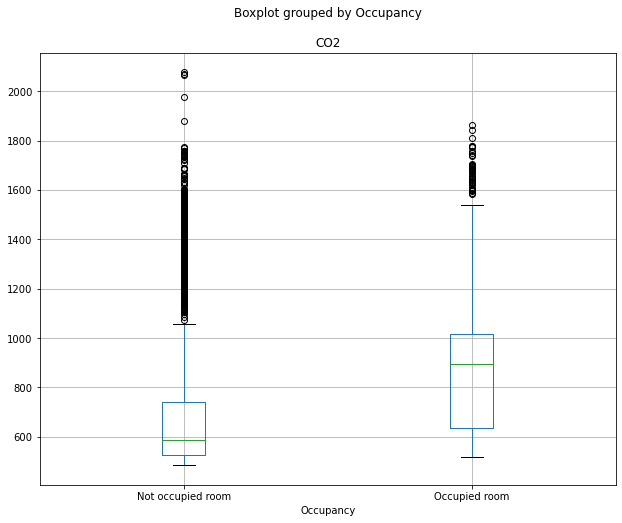

In [31]:
# A boxplot of CO2 by occupancy of the room
data.boxplot(figsize = (10,8),
             column = 'CO2', 
             by = 'Occupancy');

# Setting x-tick labels using Matplotlib 
plt.xticks([1,2], ['Not occupied room','Occupied room']);

### 3.2.3 Bar plot

Bar plots are useful when we want to compare categorical data based on their values. Each category is drawn on the x-axis, and the height of the bars represents corresponding values. 

To demonstrate this concept, we create a simple DataFrame of students and their exam scores.

In [32]:
# Example data
sample_data = pd.DataFrame({'Student': ['Thomas','Margaret','Lisa','John','Elis','Sally','Marc','Angela','Sebastian'],
                            'Score': [78,50,68,83,99,98,65,90,85],
                            'Class': ['A','B','C','B','A','A','A','B','A']})

# Printing the output
sample_data

,Student,Score,Class
0,Thomas,78,A
1,Margaret,50,B
2,Lisa,68,C
3,John,83,B
4,Elis,99,A
5,Sally,98,A
6,Marc,65,A
7,Angela,90,B
8,Sebastian,85,A


To create a bar plot, we sort values by a score in descending fashion to display students' scores. If the categories have more extended labels, it´s appropriate to set rotation to avoid overlapping. You can explicitly set the color of each bar using `color` parameter:

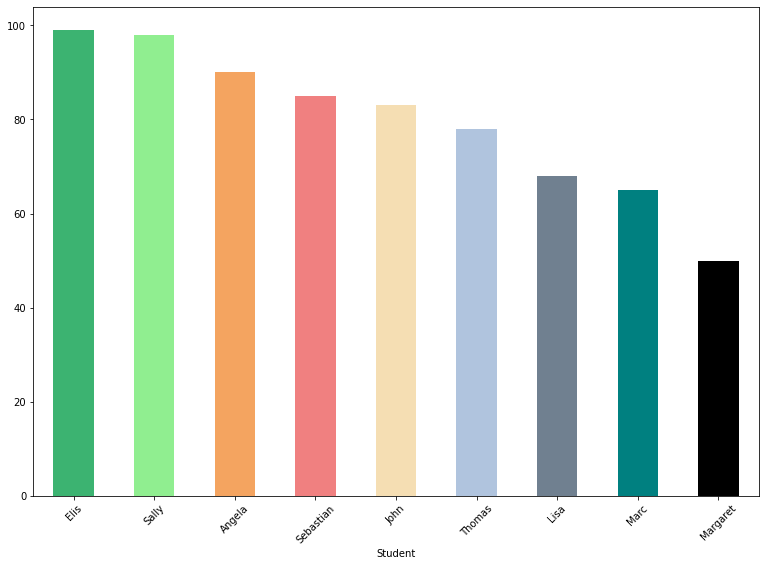

In [33]:
# A vertical barplot of students by their score
sample_data.sort_values(by = 'Score', ascending = False).plot(x = 'Student', 
                                                              y = 'Score',
                                                              kind = 'bar', 
                                                              rot = 45,
                                                              color = ['mediumseagreen','lightgreen','sandybrown',
                                                                      'lightcoral','wheat','lightsteelblue',
                                                                      'slategrey','teal','black'],
                                                              legend = False);

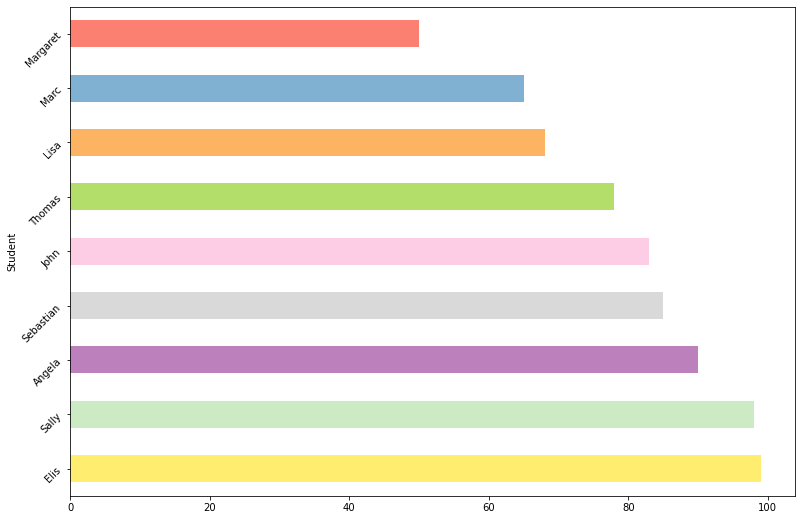

In [37]:
# TASK 3 >>> Reuse the code above and create a HORIZONTAL (left-right) barplot (kind = 'barh') of students score ()
#        >>> Set the colormaps with code: plt.cm.Set3_r(np.arange(len(sample_data)))
#        >>> Disable the legend

sample_data.sort_values(by = 'Score', ascending = False).plot(x = 'Student', 
                                                              y = 'Score',
                                                              kind = 'barh', 
                                                              rot = 45,
                                                              color = plt.cm.Set3_r(np.arange(len(sample_data))),
#                                                               color = ['mediumseagreen','lightgreen','sandybrown',
#                                                                       'lightcoral','wheat','lightsteelblue',
#                                                                       'slategrey','teal','black'],
                                                              legend = False);

To visualize the count of students based on their class, we need to count the number of occurrences:

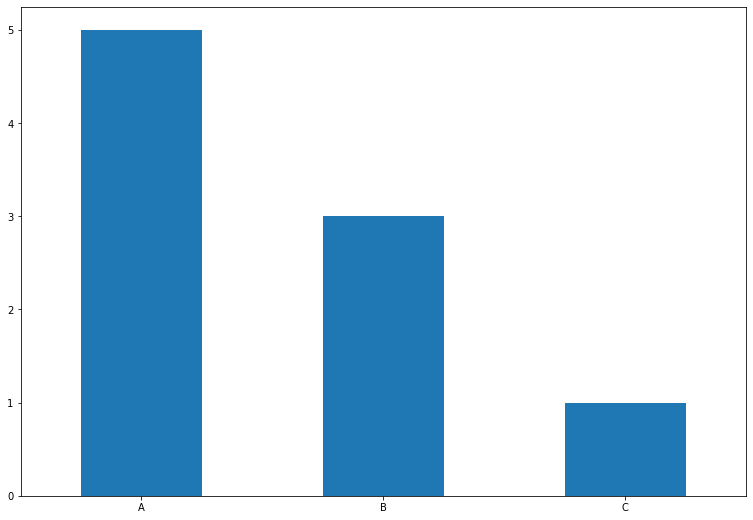

In [38]:
# Creating a bar plot of 'Class'
sample_data.Class.value_counts().plot(kind = 'bar', rot = 0);

# 4. Practice time

Now it's your turn to create some visualizations! You will explore [Obesity levels dataset](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#) and visualize some of the columns. Below you can see the full explanation of columns present in the dataset.




## 4.1 Columns explanation

The first 5 columns involves some basic information about individuals along with the information about presence of overweight in a family.

- Gender: the gender
- Age: the age
- Height: the height 
- Weight: the weight 
- family_history_with_overweight: family member who is/was overweight

Columns related to eating habits:

- FAVC: whether an individual consumes high caloric food frequently
- FCVC: how frequently are vegetables used in main meals
- NCP: the number of main meals per day
- CAEC: consuming any food between main meals
- SMOKE: smoking
- CH2O: consumption of water per day

Columns related to physical condition:
- SCC: calories intake tracking
- FAF: physical activity frequency
- TUE: usage of technological devices per day
- CALC: alcohol consumption
- MTRANS: type of transportation

The last column 'NObeyesdad' was created using equation for BMI (Body Mass Index) for each individual. Resulting values were compared with the data provided by WHO (World Health Organization) and the Mexican Normativity. 

Resulting labels:

-Underweight (< 18.5)   
-Normal (18.5 - 24.9)   
-Overweight (25 - 29.9)  
-Obesity I (30 - 34.9)  
-Obesity II (35 - 39)  
-Obesity III (> 40)  


In [81]:
# Loading the 'obesity_data.csv' via relative path into Jupyter notebook

data_ob = pd.read_csv("data/obesity_data.csv")

In [82]:
# Take a look at the first 5 rows

# data_ob[0:5]
data_ob.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 4.1.1 Exploring the data

In [83]:
# Check columns data type

data_ob.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [84]:
# Explore descriptive statistics

data_ob.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [85]:
# Check missing values

data_ob.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [86]:
# Duplicated rows

data_ob.duplicated().sum()

24

In [87]:
# Removing duplicated rows

data_ob.drop_duplicates(inplace = True)

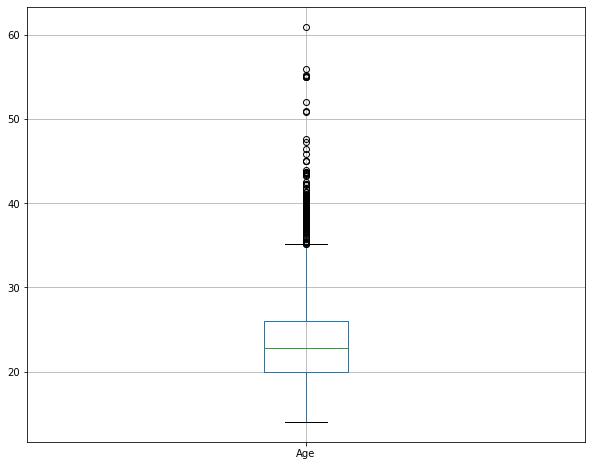

In [90]:
# TASK 4 >>> Create a boxplot of 'Age' column
#        >>> Set the size of a graph to (10,8)

data_ob.boxplot(column = 'Age', figsize = (10,8));

> What can you say about age distribution? How old is the majority of people? Is the distribution symmetrical, or are there people substantially older compared to the majority?

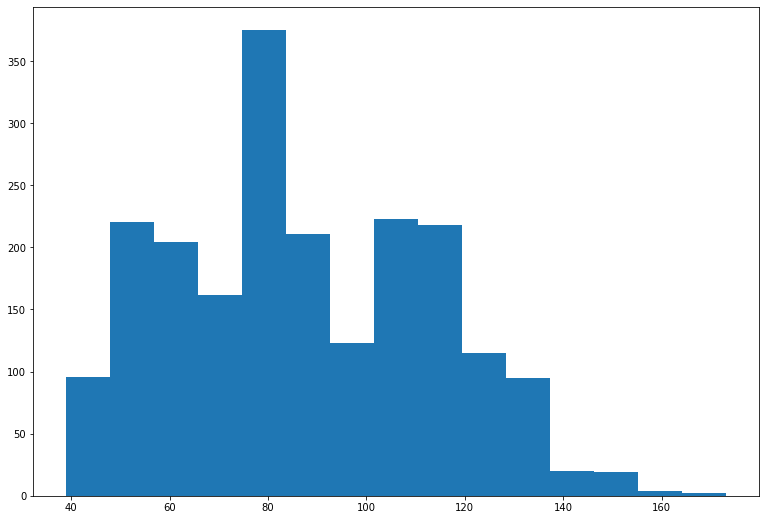

In [91]:
# TASK 5 >>> Visualize the distribution of 'Weight' column using a histogram
#        >>> Disable a grid line
#        >>> Try to set different numbers of bins

data_ob.Weight.hist(bins = 15, grid = False);

> Based on the histogram, what is the most common weight? Does this distribution look symmetrical, or rather bimodal? Could a different number of bins reflect the data better?

<AxesSubplot:title={'center':'Proportion of gender'}>

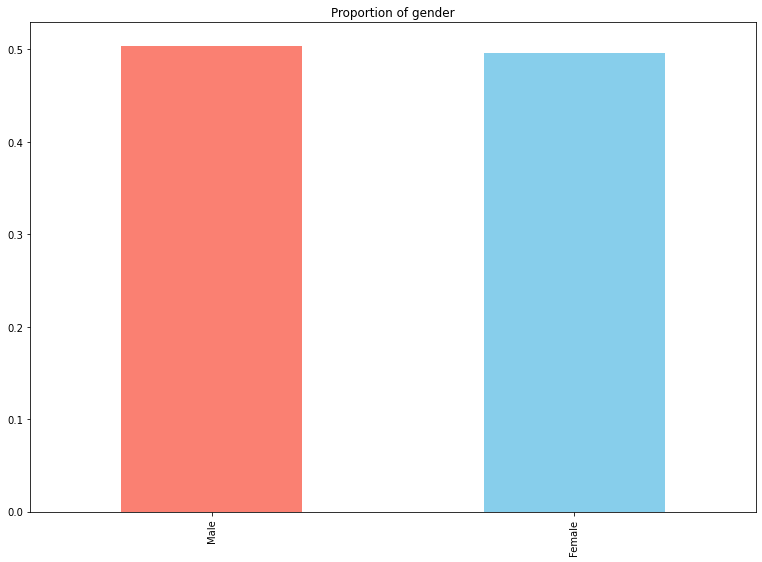

In [92]:
# TASK 6 >>> Create a bar plot with relative frequencies of 'Gender' column - specify parameter: normalize = True
#        >>> Assign different colors to males and females (male to 'salmon', female to 'skyblue')
#        >>> Add title: 'Proportion of gender'

data_ob.Gender.value_counts(normalize = True).plot(kind = 'bar',
                                                  color = ['salmon', 'skyblue'],title = 'Proportion of gender')

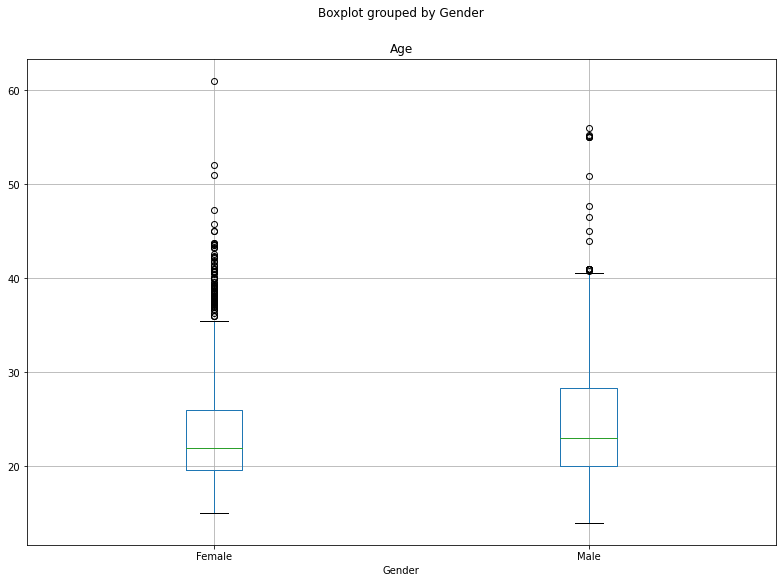

In [93]:
# TASK 7 >>> Create boxplots of 'Age' by gender

data_ob.boxplot(column = 'Age', by = 'Gender');

> Compare the ranges of values for male and female: Is the distribution similar or is there some difference? Do you see any outliers? 

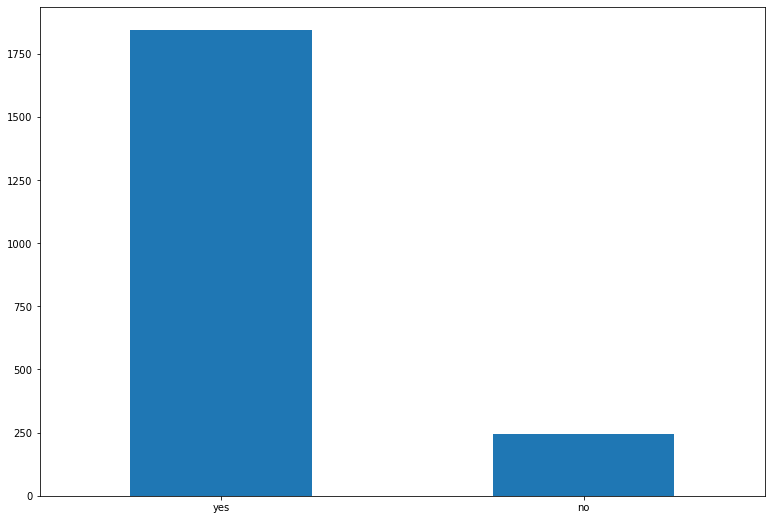

In [94]:
# TASK 8 >>> Find out how many people eat frequently high caloric meals ('FAVC')
#        >>> Set rotation of x-ticks to 0 degrees

data_ob.FAVC.value_counts().plot(kind = 'bar', rot = 0);

The question we might ask regarding obesity levels could be: 'Which individuals are more likely to be obese based on their age?' or 'Are younger adults overweight?'.

Firstly, let´s look at how many levels are there. Call `.value_counts()` function on 'NObeyesdad' column and sort categories based on obesity.

In [95]:
# Counting values of the obesity levels
data_ob.NObeyesdad.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

At first, we change data type of 'NObeyesdad' to category type in order to display obesity level in the graph in the correct order, from insufficient weight to obesity type III.

So we specify the order of obesity levels in a list and assign it to variable 'obesity_levels':

In [96]:
# Ordered categories
obesity_levels = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

Then we create category type using `CategoricalDtype()` function where we specify that values are ordered and pass 'obesity_levels' to `categories` parameter:

In [97]:
# Creating category type
ob_level = pd.api.types.CategoricalDtype(ordered = True, categories = obesity_levels)

The last step is converting the original data type of 'NObeyesdad' column to a category data type using `astype()` function:

In [98]:
# Converting 'NObeyesdad' to category type
data_ob.NObeyesdad = data_ob.NObeyesdad.astype(ob_level)

We can plot obesity levels to see how these vary according to the age of individuals. To avoid overlapping label names of these categories, you can set the rotation of labels to 45 degrees with `rot` parameter. Also, disabling grid lines can help visualization to be more compendious.

<AxesSubplot:title={'center':'Age'}, xlabel='NObeyesdad'>

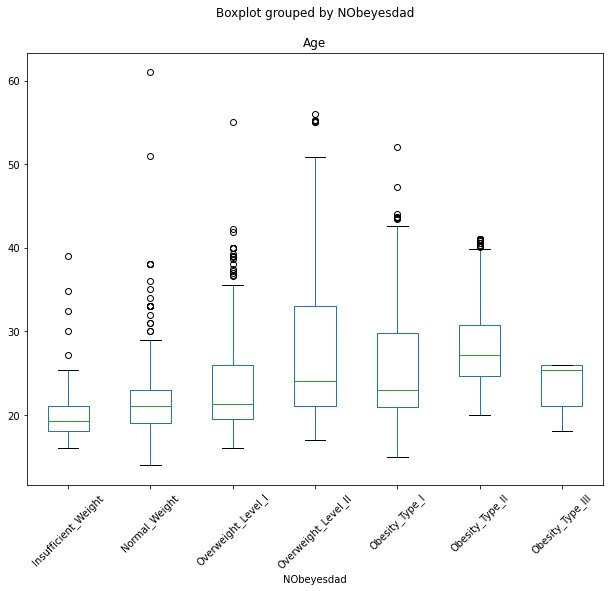

In [100]:
# TASK 9 >>> Create a boxplot of column 'Age' by 'NObeyesdad'
#        >>> Set a Figure size: (10,8)
#        >>> Set labels on x-axis to 45 using rot parameter
#        >>> Disable grid line

data_ob.boxplot(figsize = (10,8), column = 'Age', by = 'NObeyesdad', rot = 45, grid = False)

> Looking at the created plot, can you see some patterns? At what ages do people tend to suffer from some obesity level? 

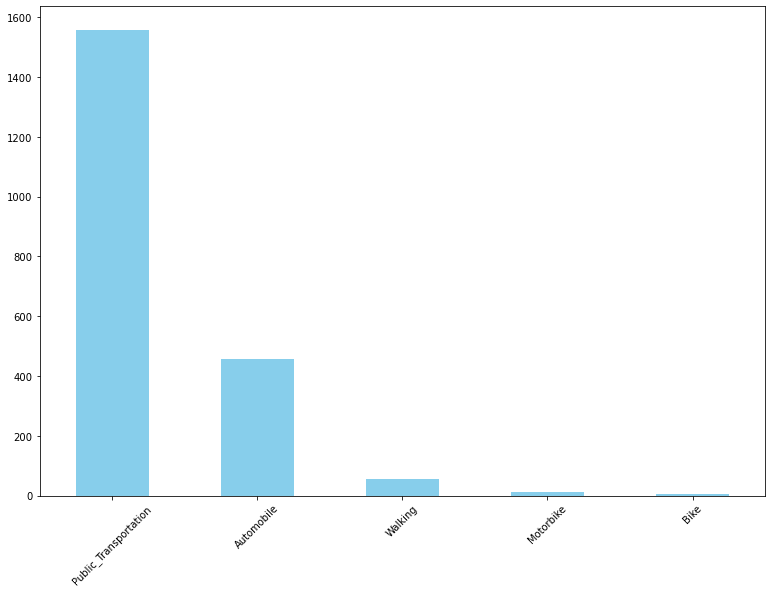

In [101]:
# TASK 10 >>> Create a bar plot of 'MTRANS' column to find out how many people use certain kind of transportation
#         >>> Set labels on x-axis to 45 using rot parameter
#         >>> Set color: 'skyblue'
#         >>> What is the most popular kind of transportation? 

data_ob.MTRANS.value_counts().plot(kind='bar', rot =45, color = 'skyblue');

Let´s filter only those individuals who use an automobile for transportation or walk. Then we´ll look at their weight.

In [102]:
# Filtering only those rows where transportation kind is "Automobile" and "Walking"
subset_transport = data_ob[data_ob['MTRANS'].isin(["Automobile","Walking"])]

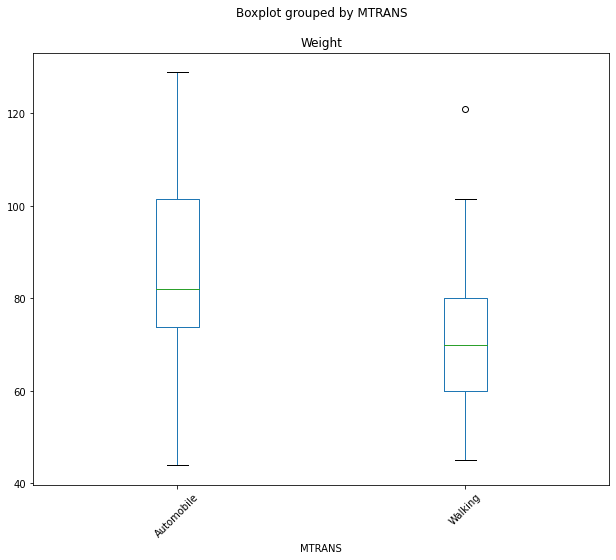

In [103]:
# TASK 11 >>> Create a boxplot of newly created 'subset_transport' DataFrame
#         >>> Set a Figure size: (10,8)
#         >>> Set 'Weight' to column parameter and 'MTRANS' to by parameter
#         >>> Set labels on x-axis to 45 using rot parameter
#         >>> Disable a grid line

subset_transport.boxplot(figsize = (10,8), column = 'Weight', by = 'MTRANS', rot = 45, grid = False);

> What can you say about the distribution of these two groups of people? Which group has a lower weight overall? Looking at the result, are you motivated to take a walk? :)